In [1]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

In [2]:
result_dir = Path(os.getcwd())

proj_dir = result_dir.parent

os.chdir(proj_dir)

In [3]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
save_path = Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/msc-thesis/Figures/Python")

In [5]:
from utils.results import SimulationResults

RUNID = "test0"

test0_results = SimulationResults(runids=[RUNID])

print(test0_results.var_list)
print(test0_results.timestep_output_ids)

['2m_temperature' 'abs_xgr' 'abs_zgr' 'angles' 'computational_time'
 'convective_heat_flux' 'cumulative_computational_time'
 'ground_enthalpy_distribution' 'ground_temperature_distribution'
 'latent_heat_flux' 'long_wave_radiation_flux' 'mean_wave_angle'
 'orbital_velocity' 'radiation_stress_xx' 'radiation_stress_xy'
 'radiation_stress_yy' 'run_up' 'sea_ice_cover' 'sea_surface_temperature'
 'solar_radiation_factor' 'solar_radiation_flux' 'storm_surge'
 'thaw_depth' 'total_heat_flux' 'velocity_magnitude' 'wave_energy'
 'wave_height' 'wind_direction' 'wind_velocity' 'xgr' 'zgr']
[    0    24    48    72    96   120   144   168   192   216   240   264
   288   312   336   360   384   408   432   456   480   504   528   552
   576   600   624   648   672   696   720   744   768   792   816   840
   864   888   912   936   960   984  1008  1032  1056  1080  1104  1128
  1152  1176  1200  1224  1248  1272  1296  1320  1344  1368  1392  1416
  1440  1464  1488  1512  1536  1560  1584  1608  1

In [6]:
# test0_results.get_var_timeseries("cumulative_computational_time")[RUNID]

In [7]:
# xgr0 = test0_results.get_var_timestep("xgr", 0)[RUNID]
# zgr0 = test0_results.get_var_timestep("zgr", 0)[RUNID]

# xgr1416 = test0_results.get_var_timestep("xgr", 1416)[RUNID]
# zgr1416 = test0_results.get_var_timestep("zgr", 1416)[RUNID]

# plt.plot(xgr0, zgr0, label='t=0')
# plt.plot(xgr1416, zgr1416, label='t=1416')

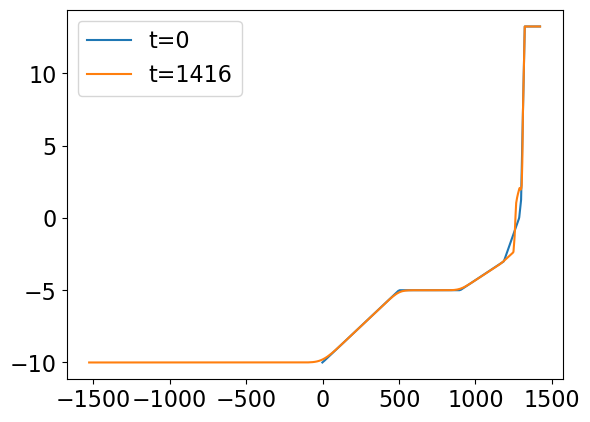

In [8]:
xgr0 = test0_results.get_var_timestep("xgr", 0)[RUNID]
zgr0 = test0_results.get_var_timestep("zgr", 0)[RUNID]

xgr96 = test0_results.get_var_timestep("xgr", 17496)[RUNID]
zgr96 = test0_results.get_var_timestep("zgr", 17496)[RUNID]

plt.plot(xgr0, zgr0, label='t=0')
plt.plot(xgr96, zgr96, label='t=1416')

# plt.xlim((1200, 1400))

plt.legend()

# print(zgr0)
# print(zgr96)

So the bathymetry is not updating. What about temperature distribution?

In [9]:
abs_xgr0 = test0_results.get_var_timestep("abs_xgr", 0)[RUNID]
abs_zgr0 = test0_results.get_var_timestep("abs_zgr", 0)[RUNID]
ground_temperature_distribution0 = test0_results.get_var_timestep(
    "ground_temperature_distribution", 0)[RUNID]

abs_xgr192 = test0_results.get_var_timestep("abs_xgr", 192)[RUNID]
abs_zgr192 = test0_results.get_var_timestep("abs_zgr", 192)[RUNID]
ground_temperature_distribution192 = test0_results.get_var_timestep(
    "ground_temperature_distribution", 192)[RUNID]

C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_59072\54416317.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


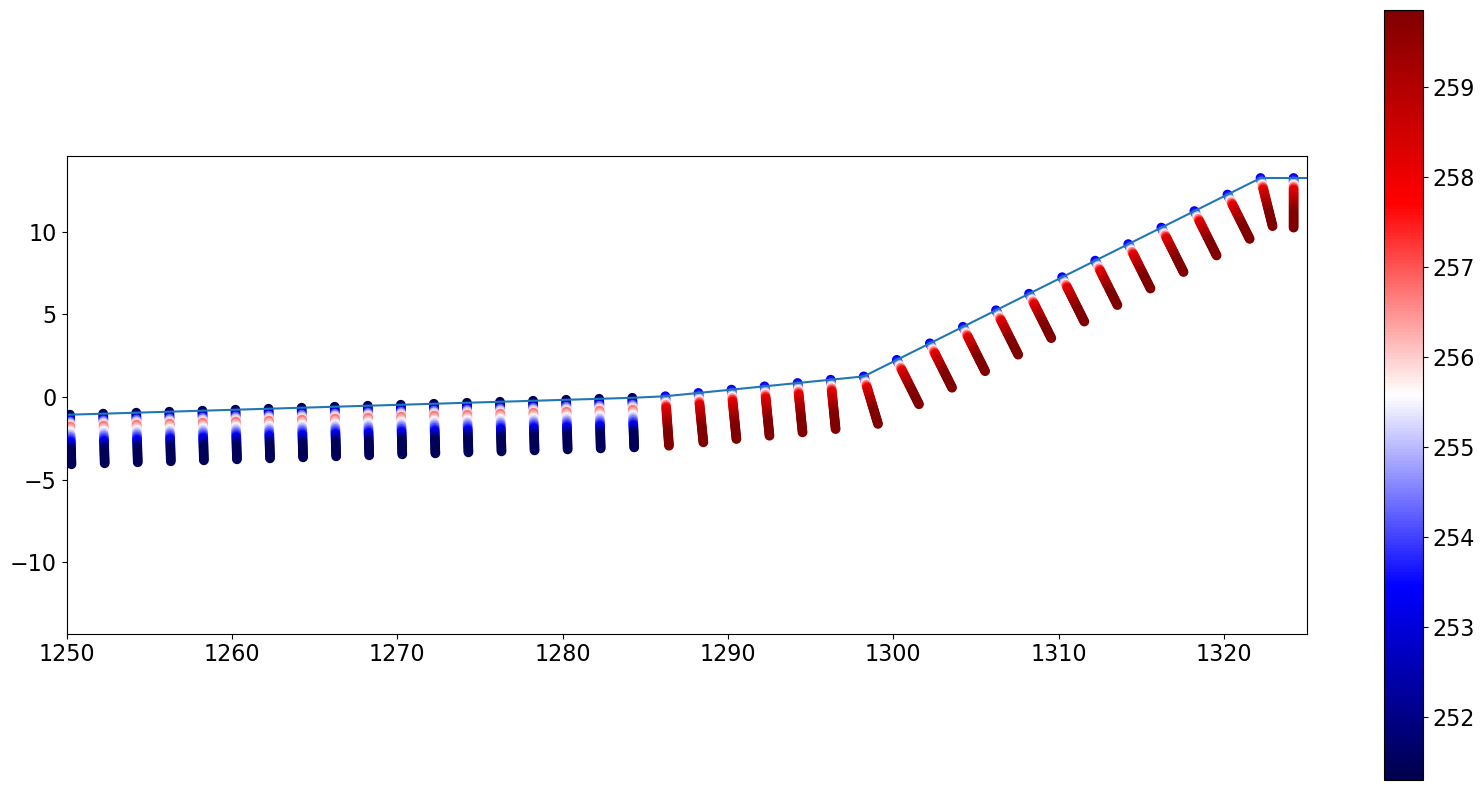

In [10]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(xgr0, zgr0, label='bathymetry')

scatter = ax.scatter(abs_xgr0, abs_zgr0, 
                     c=ground_temperature_distribution0, cmap='seismic')

sm = ScalarMappable(cmap='seismic')

sm.set_array(ground_temperature_distribution0)

plt.colorbar(sm, ax=ax)

ax.set_aspect("equal")

ax.set_xlim(1250, 1325)

fig.show()

C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_59072\1740549458.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


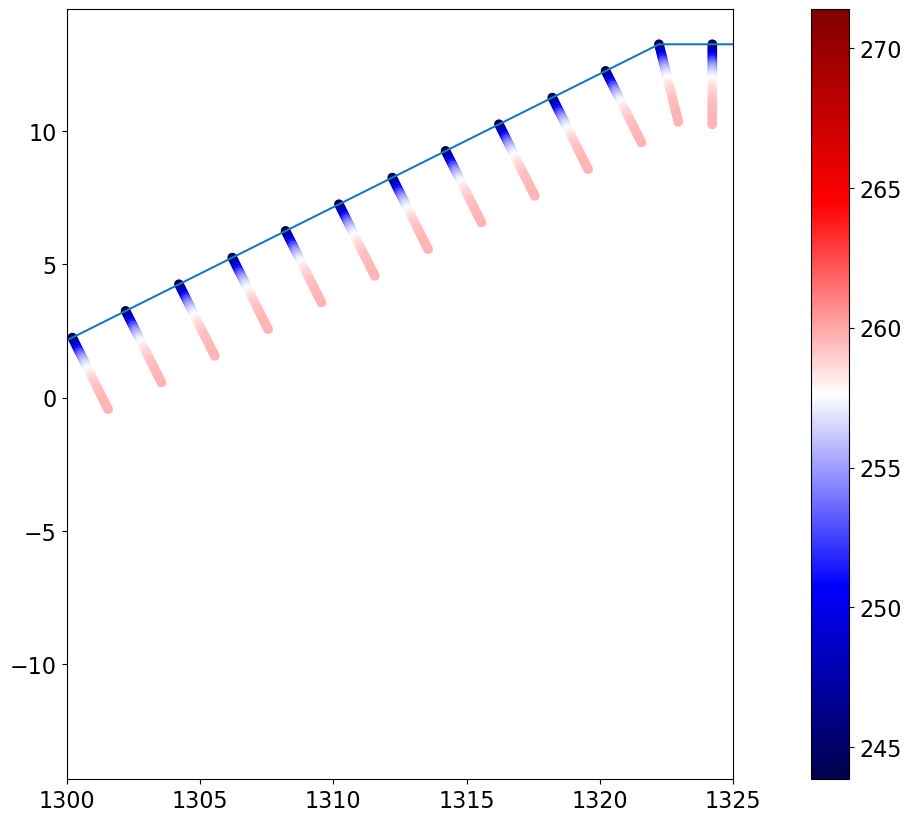

In [11]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(xgr0, zgr0, label='bathymetry')

scatter = ax.scatter(abs_xgr192, abs_zgr192, 
                     c=ground_temperature_distribution192, cmap='seismic')

sm = ScalarMappable(cmap='seismic')

sm.set_array(ground_temperature_distribution192)

plt.colorbar(sm, ax=ax)

ax.set_aspect("equal")

ax.set_xlim(1300, 1325)

fig.show()

C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_59072\4024008093.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


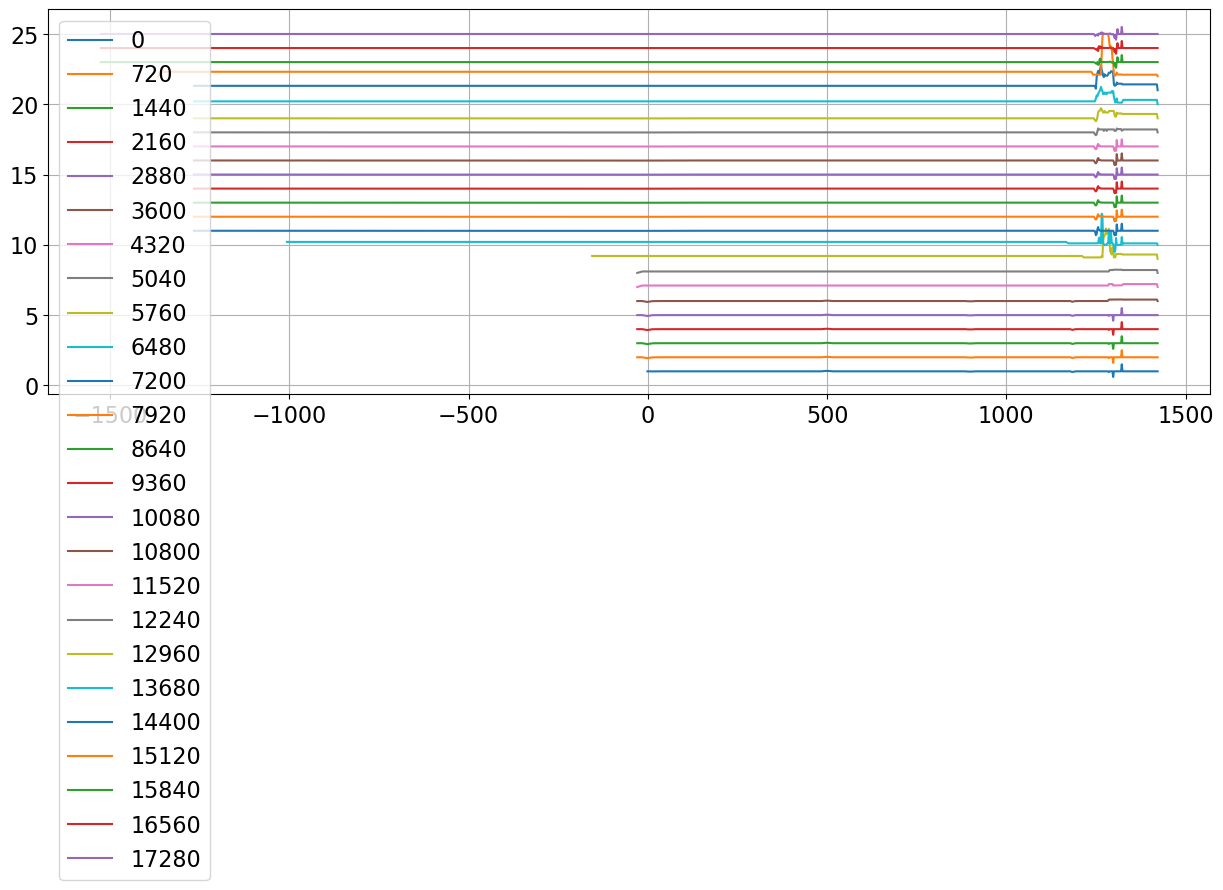

In [12]:
fig, ax = plt.subplots(figsize=(15,5))

i = 0

for t in np.array(test0_results.timestep_output_ids)[::30]:
    
    i += 1

    xgr = test0_results.get_var_timestep('xgr', t)[RUNID]
    zgr = test0_results.get_var_timestep('zgr', t)[RUNID]
    thaw_depth = test0_results.get_var_timestep('thaw_depth', t)[RUNID] + i
    
    ax.plot(xgr, thaw_depth, label=t)
     
        
ax.legend()
ax.grid()

# ax.set_xlim((1275, 1300))

fig.show()

In [13]:
t = test0_results.timestep_output_ids
comp_time = test0_results.get_var_timeseries("cumulative_computational_time")[RUNID]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_59072\418360138.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


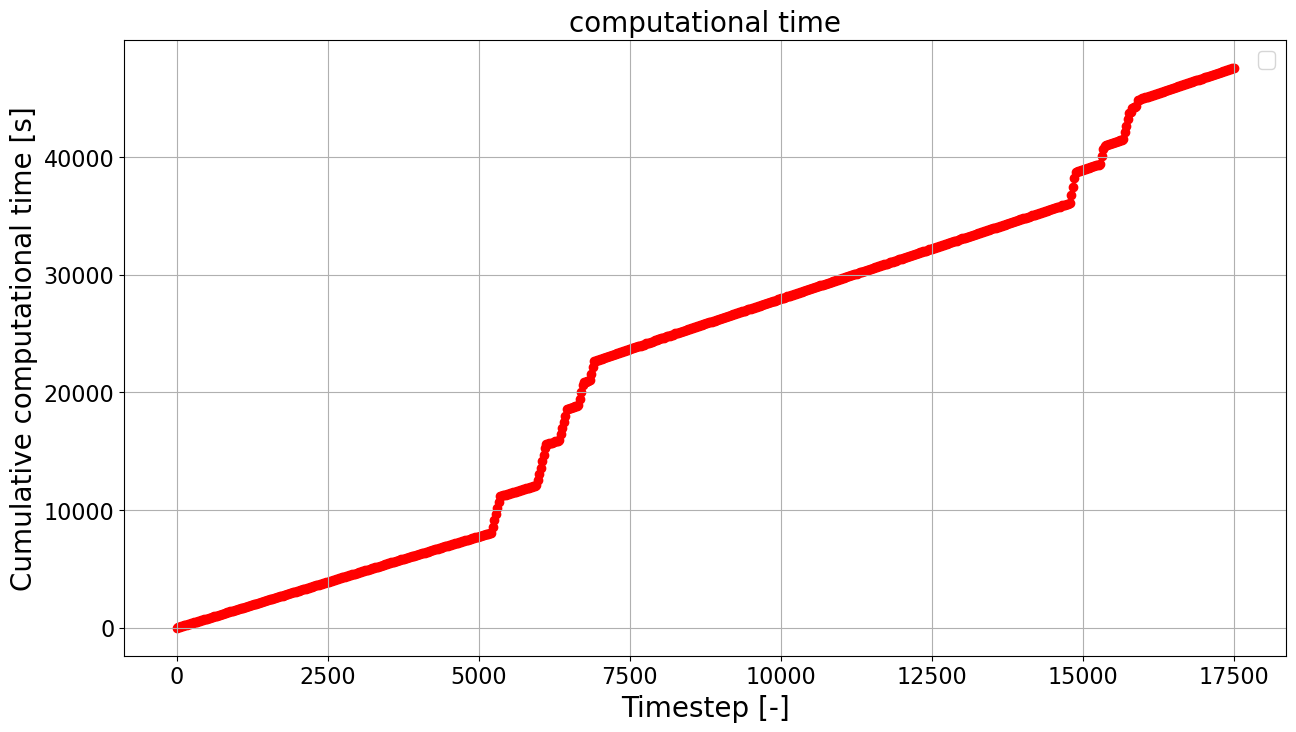

In [14]:
fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(t, comp_time, c='r')

ax.set_xlabel("Timestep [-]")
ax.set_ylabel("Cumulative computational time [s]")

ax.grid()
ax.legend()

ax.set_title('computational time')

fig.show()

figname="computational_time_test0.png"

plt.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)

In [15]:
xgr0 = test0_results.get_var_timestep("xgr", 0)[RUNID]
zgr0 = test0_results.get_var_timestep("zgr", 0)[RUNID]

xgr_end = test0_results.get_var_timestep("xgr", 17496)[RUNID]
zgr_end = test0_results.get_var_timestep("zgr", 17496)[RUNID]

Text(0.5, 1.0, '01/01/2020 - 31/12/2021')

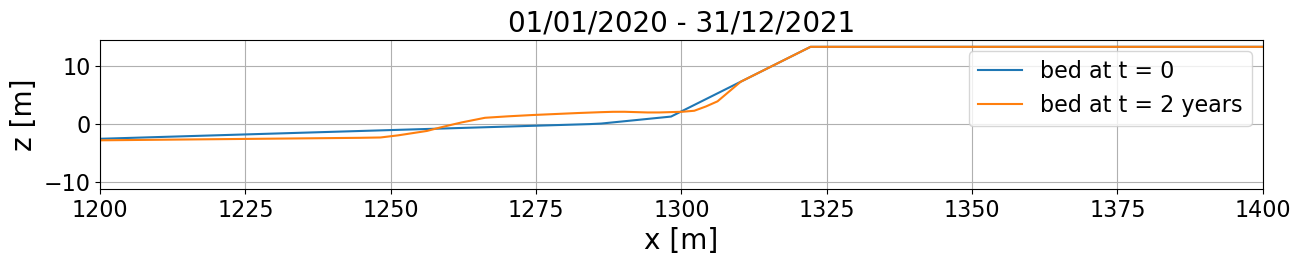

In [16]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(xgr0, zgr0, label='bed at t = 0')
ax.plot(xgr_end, zgr_end, label='bed at t = 2 years')

ax.set_xlabel("x [m]")
ax.set_ylabel("z [m]")

ax.legend()
ax.grid()

ax.set_aspect("equal")

ax.set_xlim((1200, 1400))

ax.set_title("01/01/2020 - 31/12/2021")

Text(0.5, 1.0, '01/01/2020 - 31/12/2021')

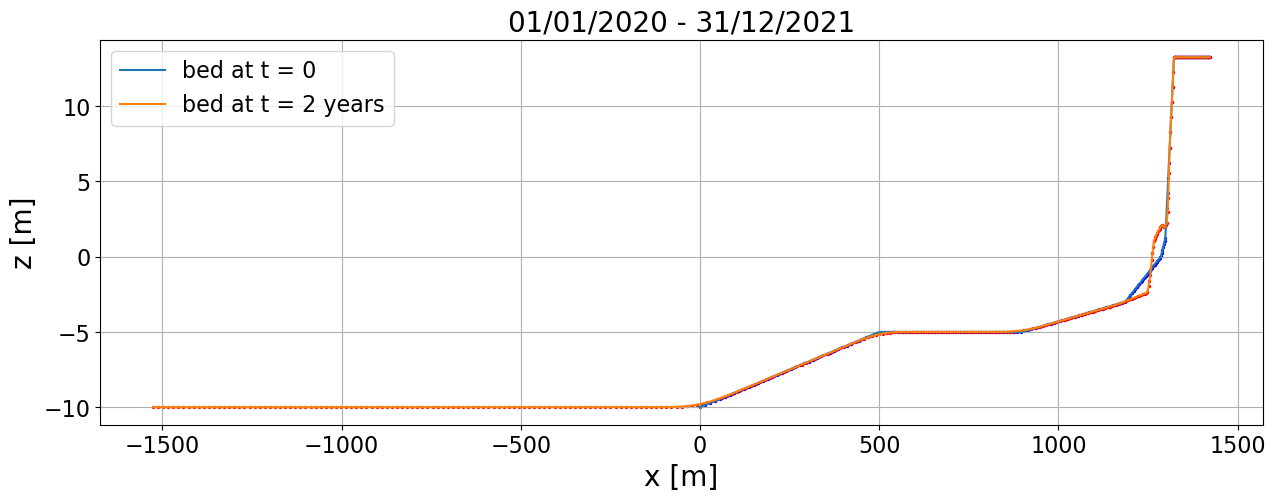

In [17]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(xgr0, zgr0, label='bed at t = 0')
ax.plot(xgr_end, zgr_end, label='bed at t = 2 years')

ax.scatter(xgr0, zgr0, s=2, color='b')
ax.scatter(xgr_end, zgr_end, s=2, color='r')

ax.set_xlabel("x [m]")
ax.set_ylabel("z [m]")

ax.legend()
ax.grid()

ax.set_title("01/01/2020 - 31/12/2021")

In [18]:
thaw_depth0 = test0_results.get_var_timestep("thaw_depth", 0)[RUNID]

thaw_depth_summer = test0_results.get_var_timestep("thaw_depth", 6000)[RUNID]
xgr_summer = test0_results.get_var_timestep("xgr", 6000)[RUNID]
zgr_summer = test0_results.get_var_timestep("zgr", 6000)[RUNID]

Text(0.5, 1.0, 'thaw interface (t=0)')

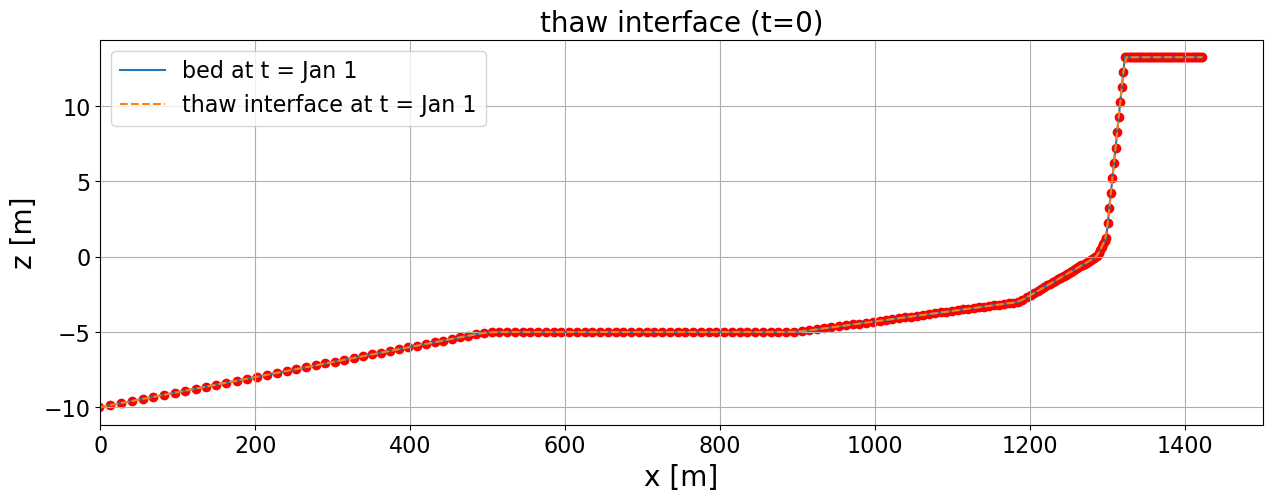

In [86]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(xgr0, zgr0, label='bed at t = Jan 1')
ax.scatter(xgr0, zgr0, color='r')
ax.plot(xgr0, zgr0 - thaw_depth0, label='thaw interface at t = Jan 1', linestyle='--')

ax.set_xlabel("x [m]")
ax.set_ylabel("z [m]")

ax.legend()
ax.grid()

ax.set_xlim((0, 1500))

ax.set_title("thaw interface (t=0)")

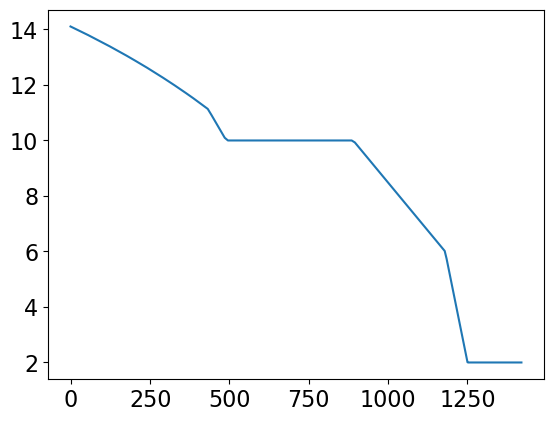

In [87]:
plt.plot(xgr0[:-1], xgr0[1:]-xgr0[:-1])

Text(0.5, 1.0, 'thaw interface (t=6000)')

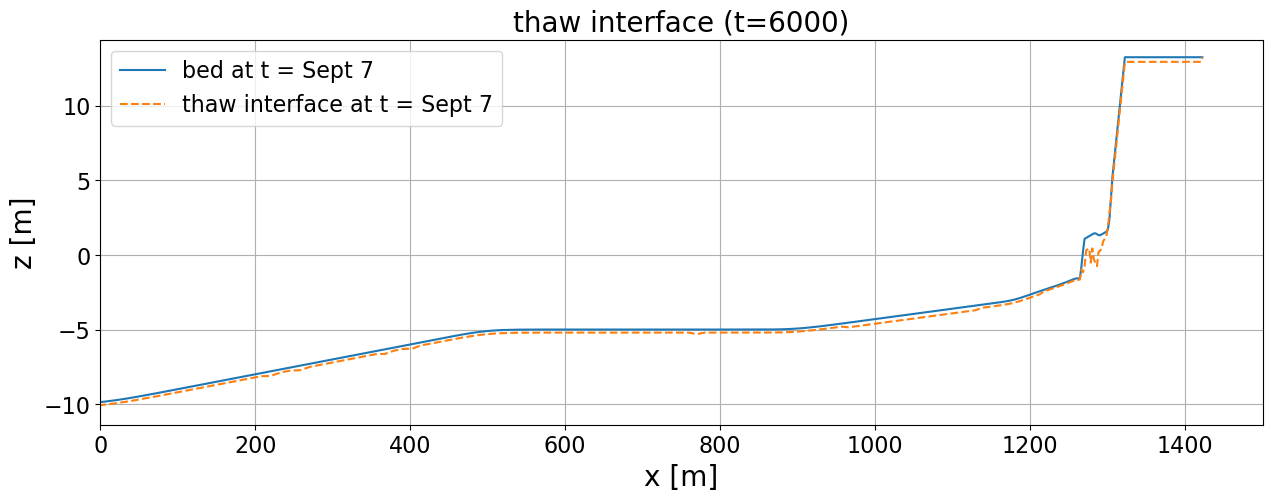

In [20]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(xgr_summer, zgr_summer, label='bed at t = Sept 7')
ax.plot(xgr_summer, zgr_summer - thaw_depth_summer, label='thaw interface at t = Sept 7', linestyle='--')

ax.set_xlabel("x [m]")
ax.set_ylabel("z [m]")

ax.legend()
ax.grid()

ax.set_xlim((0, 1500))

ax.set_title("thaw interface (t=6000)")

In [21]:
t_output = np.array(test0_results.timestep_output_ids)

xgr_len = []
xgr_min = []

for t in t_output:
    
    xgr = test0_results.get_var_timestep('xgr', t)[RUNID]
    
    xgr_len.append(len(xgr))
    xgr_min.append(np.min(xgr))


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_59072\3426872591.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


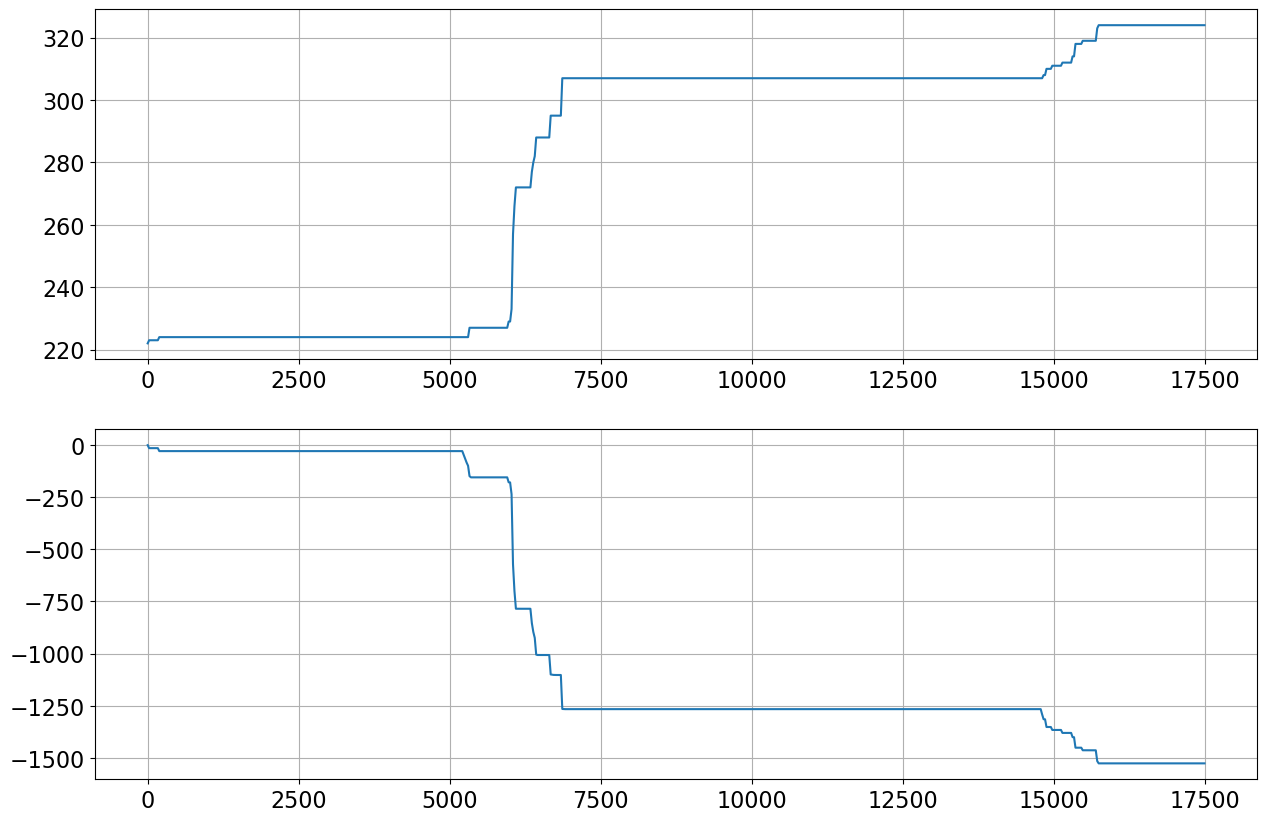

In [22]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

axs[0].plot(t_output, xgr_len)
axs[1].plot(t_output, xgr_min)

axs[0].grid()
axs[1].grid()

fig.show()

In [23]:
%matplotlib inline

In [24]:
from matplotlib import colormaps

cmap = colormaps["plasma"]

colors = cmap(np.linspace(0, 1, len(test0_results.timestep_output_ids)))

In [81]:
from datetime import datetime

i = 1.5958944e+18

print(datetime.fromtimestamp(i * 10**-9))

2020-07-28 02:00:00


[ 5016  5040  5064  5088  5112  5136  5160  5184  5208  5232  5256  5280
  5304  5328  5352  5376  5400  5424  5448  5472  5496  5520  5544  5568
  5592  5616  5640  5664  5688  5712  5736  5760  5784  5808  5832  5856
  5880  5904  5928  5952  5976  6000  6024  6048  6072  6096  6120  6144
  6168  6192  6216  6240  6264  6288  6312  6336  6360  6384  6408  6432
  6456  6480  6504  6528  6552  6576  6600  6624  6648  6672  6696  6720
  6744  6768  6792  6816  6840  6864  6888  6912  6936  6960  6984  7008
  7032  7056  7080  7104  7128  7152  7176  7200  7224  7248  7272  7296
  7320  7344  7368  7392  7416  7440  7464  7488  7512  7536  7560  7584
  7608  7632  7656  7680  7704  7728  7752  7776  7800  7824  7848  7872
  7896  7920  7944  7968  7992 14520 14544 14568 14592 14616 14640 14664
 14688 14712 14736 14760 14784 14808 14832 14856 14880 14904 14928 14952
 14976 15000 15024 15048 15072 15096 15120 15144 15168 15192 15216 15240
 15264 15288 15312 15336 15360 15384 15408 15432 15

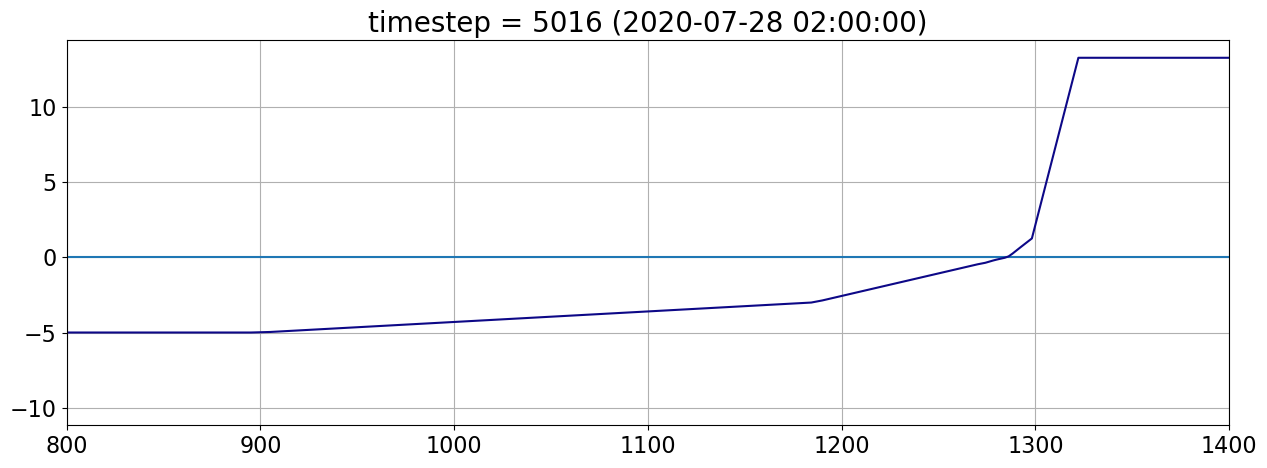

In [84]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(15,5))

lines = []

wl_line, = ax.plot((0, 1500), (0,0), color='C0')

ax.grid()


def animation_function(i):
    
    for l in lines:
        l.set(alpha=0.3)
        
    output_id = animation_timesteps[i]
    timestamp = datetime.fromtimestamp(test0_results.timestamps[np.where(output_id==test0_results.timestep_ids)][0] * 10**-9)
        
    print(output_id)
    # print(timestamp)
        
    ax.set_title(f'timestep = {output_id} ({timestamp})')
    
    xgr = test0_results.get_var_timestep("xgr", output_id)[RUNID]
    zgr = test0_results.get_var_timestep("zgr", output_id)[RUNID]
    
    wl = test0_results.get_var_timestep("storm_surge", output_id)[RUNID]
    

    line, = ax.plot(xgr, zgr, color=colors[i])
    lines.append(line)

    wl_line.set_ydata([wl, wl])
    
    ax.set_xlim((800, 1400))


    

# 5000 - 8000 & 14500 - 16500
mask = (test0_results.timestep_output_ids > 5000) * (test0_results.timestep_output_ids < 8000) + \
    (test0_results.timestep_output_ids > 14500) * (test0_results.timestep_output_ids < 16500)

animation_timesteps = test0_results.timestep_output_ids[np.nonzero(mask)]

print(animation_timesteps)

cmap = colormaps["plasma"]

colors = cmap(np.linspace(0, 1, len(animation_timesteps)))
        
animation = FuncAnimation(fig, animation_function, frames=range(len(animation_timesteps)))
# animation = FuncAnimation(fig, animation_function, frames=range(len(test0_results.timestep_output_ids[:20])))

In [85]:
animation.save(f"results/{RUNID}.mp4", writer='ffmpeg', fps=5)

5016
5016
5040
5064
5088
5112
5136
5160
5184
5208
5232
5256
5280
5304
5328
5352
5376
5400
5424
5448
5472
5496
5520
5544
5568
5592
5616
5640
5664
5688
5712
5736
5760
5784
5808
5832
5856
5880
5904
5928
5952
5976
6000
6024
6048
6072
6096
6120
6144
6168
6192
6216
6240
6264
6288
6312
6336
6360
6384
6408
6432
6456
6480
6504
6528
6552
6576
6600
6624
6648
6672
6696
6720
6744
6768
6792
6816
6840
6864
6888
6912
6936
6960
6984
7008
7032
7056
7080
7104
7128
7152
7176
7200
7224
7248
7272
7296
7320
7344
7368
7392
7416
7440
7464
7488
7512
7536
7560
7584
7608
7632
7656
7680
7704
7728
7752
7776
7800
7824
7848
7872
7896
7920
7944
7968
7992
14520
14544
14568
14592
14616
14640
14664
14688
14712
14736
14760
14784
14808
14832
14856
14880
14904
14928
14952
14976
15000
15024
15048
15072
15096
15120
15144
15168
15192
15216
15240
15264
15288
15312
15336
15360
15384
15408
15432
15456
15480
15504
15528
15552
15576
15600
15624
15648
15672
15696
15720
15744
15768
15792
15816
15840
15864
15888
15912
15936
15960
1598